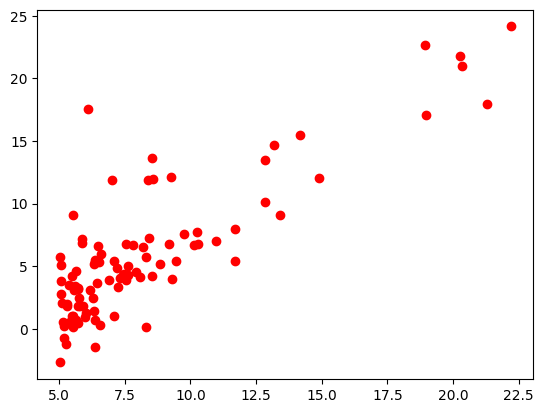

In [ ]:
#Question 1
import pandas as pd
df = pd.read_csv('data2.csv')
X = df['x']
y = df['y']

import matplotlib.pyplot as plt
plt.plot(X, y,'ro')
plt.show()

In [ ]:
#Question 2
import numpy as np
# adds x0 = 1 to each instance
X_b = np.column_stack((np.ones_like(X), X))
# calculate normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# best values for theta
intercept, *coef = theta_best
print(f"Intercept: {intercept}\n\
Coefficients: {coef}")

Intercept: -3.8957808783118772
Coefficients: [1.1930336441895957]


In [25]:
from sklearn.linear_model import SGDRegressor

# Splitting the data into training and testing sets
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, random_state=1)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)



In [26]:
#Question 3b
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

# Adding a bias term to X
X_train_with_bias = np.c_[np.ones(len(X_train)), X_train]
X_test_with_bias = np.c_[np.ones(len(X_test)), X_test]

# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to perform batch gradient descent
def batch_gradient_descent(X, y, X_test, y_test, learning_rate, num_iterations, mse_threshold):
    m, n = X.shape
    batch_w = np.zeros((n, 1))
    batch_w_list = []
    mse_train_list = []
    mse_test_list = []

    for i in range(num_iterations):
        # Calculating weights for the current iteration
        gradient = 2/m * X.T.dot(X.dot(batch_w) - y)
        batch_w = batch_w - learning_rate * gradient
        batch_w_list.append([batch_w[0].item(), batch_w[1].item()])

        # Calculating MSE for the current iteration
        y_pred_train = X.dot(batch_w)
        mse_train_list.append(mean_squared_error(y, y_pred_train))
        y_pred_test = X_test.dot(batch_w)
        mse_test_list.append(mean_squared_error(y_test, y_pred_test))

        # Checking the termination condition
        if i > 0 and mse_train_list[i] < mse_threshold:
            print(f"(batch) Terminating at iteration {i}.")
            break

    return batch_w, batch_w_list, mse_train_list, mse_test_list

# Function to perform stochastic gradient descent
def stochastic_gradient_descent(X, y, X_test, y_test, learning_rate, num_iterations, mse_threshold):
    m,  n = X.shape
    stochastic_w = np.zeros((n, 1))
    stochastic_w_list = []
    mse_train_list = []
    mse_test_list = []

    for i in range(num_iterations):

        permutation = np.random.permutation(m) # Shuffle the data
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]


        random_index = np.random.randint(m) # Selecting one random data sample
        xi = X_shuffled[random_index:random_index+1]
        yi = y_shuffled[random_index:random_index+1]

        # Calculating weights for current iteration
        gradient = 2 * xi.T.dot(xi.dot(stochastic_w) - yi)
        stochastic_w = stochastic_w - learning_rate * gradient
        stochastic_w_list.append([stochastic_w[0].item(), stochastic_w[1].item()])

        # Calculating MSE for the current iteration
        y_pred_train = X.dot(stochastic_w)
        mse_train_list.append(mean_squared_error(y, y_pred_train))
        y_pred_test = X_test.dot(stochastic_w)
        mse_test_list.append(mean_squared_error(y_test, y_pred_test))

        # Checking termination condition
        if i > 0 and mse_train_list[i] < mse_threshold:
            print(f"(stoc) Terminating at iteration {i}.")
            break

    return stochastic_w, stochastic_w_list, mse_train_list, mse_test_list

In [27]:
# Batch Gradient Descent
batch_num_iterations = 500
batch_learning_rate = 0.001
batch_mse_threshold = 9.5 # termination condition threshold
w_batch, w_batch_list, batch_mse_list_train, batch_mse_list_test = batch_gradient_descent(X_train_with_bias, y_train, X_test_with_bias, y_test, learning_rate=batch_learning_rate, num_iterations=batch_num_iterations, mse_threshold=batch_mse_threshold)

# Stochastic Gradient Descent
stoc_num_iterations = 9500
stoc_learning_rate = 0.0001
stoc_mse_threshold = 9.5 # termination condition threshold
w_stoc, w_stoc_list, stoc_mse_list_train, stoc_mse_list_test = stochastic_gradient_descent(X_train_with_bias, y_train, X_test_with_bias, y_test, learning_rate=stoc_learning_rate, num_iterations=stoc_num_iterations, mse_threshold=stoc_mse_threshold)

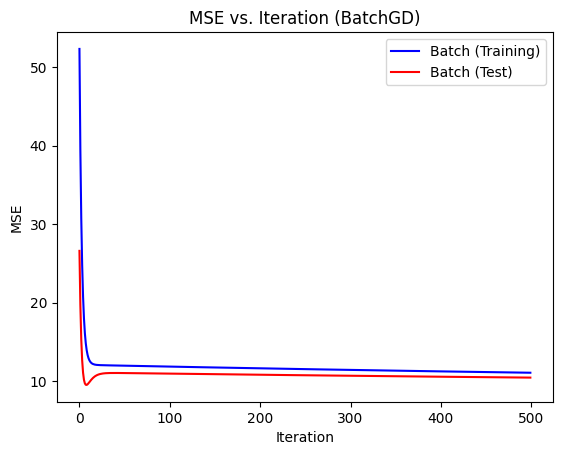

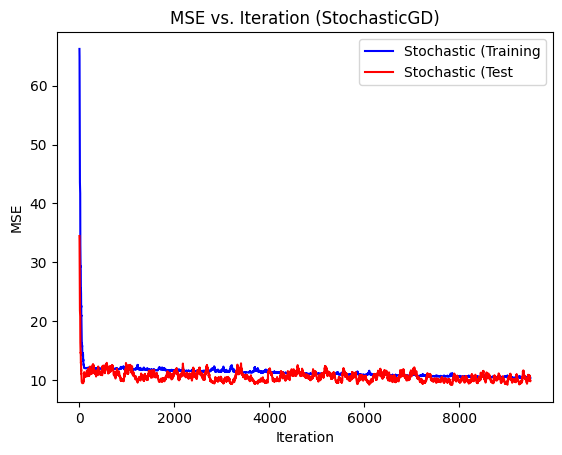

In [28]:
# Plot MSE vs. Iteration for Batch Gradient Descent
plt.plot(batch_mse_list_train, 'b', label='Batch (Training)')
plt.plot(batch_mse_list_test, 'r', label='Batch (Test)')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration (BatchGD)')
plt.legend()
plt.show()

# Plot MSE vs. Iteration for Stochastic Gradient Descent
plt.plot(stoc_mse_list_train,'b', label='Stochastic (Training')
plt.plot(stoc_mse_list_test,'r', label='Stochastic (Test')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration (StochasticGD)')
plt.legend()
plt.show()

(stoc) Terminating at iteration 2143.
(stoc) Terminating at iteration 1205.
(stoc) Terminating at iteration 861.
(stoc) Terminating at iteration 883.
(batch) Terminating at iteration 448.
(stoc) Terminating at iteration 491.
(batch) Terminating at iteration 373.
(stoc) Terminating at iteration 564.
(batch) Terminating at iteration 320.
(stoc) Terminating at iteration 971.
(batch) Terminating at iteration 280.
(stoc) Terminating at iteration 52.
(batch) Terminating at iteration 249.
(stoc) Terminating at iteration 566.
(batch) Terminating at iteration 224.
(stoc) Terminating at iteration 223.


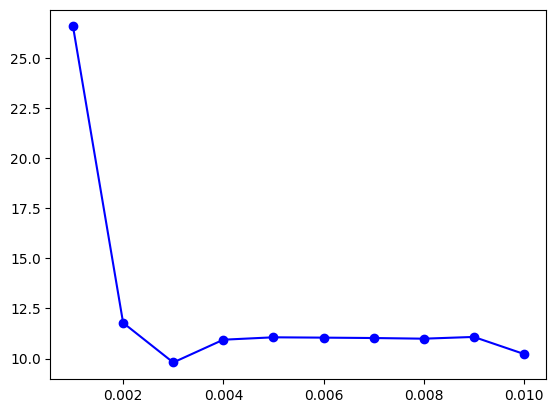

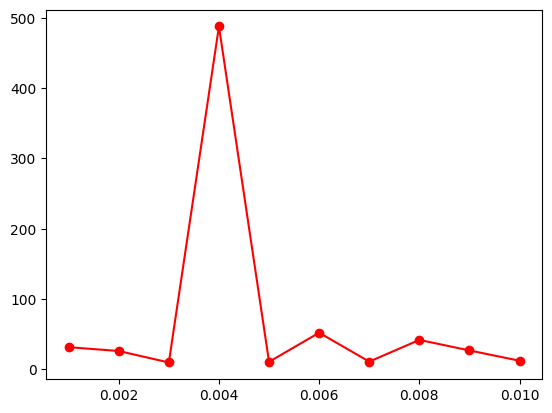

In [29]:
#Question 3c
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
batch_mse_testing_list = []
stoc_mse_testing_list = []

for i, r in enumerate(learning_rates):
    w_batch2, w_batch_list2, batch_mse_list_train2, batch_mse_list_test2 = batch_gradient_descent(X_train_with_bias, y_train, X_test_with_bias, y_test, learning_rate=r, num_iterations=batch_num_iterations, mse_threshold=batch_mse_threshold)
    batch_mse_testing_list.append(batch_mse_list_test2[i])
    w_stoc2, w_stoc_list2, stoc_mse_list_train2, stoc_mse_list_test2 = stochastic_gradient_descent(X_train_with_bias, y_train, X_test_with_bias, y_test, learning_rate=r, num_iterations=stoc_num_iterations, mse_threshold=stoc_mse_threshold)
    stoc_mse_testing_list.append(stoc_mse_list_test2[i])


plt.plot(learning_rates, batch_mse_testing_list, 'bo-')
plt.show()
plt.plot(learning_rates, stoc_mse_testing_list, 'ro-')
plt.show()
